# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).  Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd

In [2]:
for n in range (1995,2016):
    nombrearchivo = ('Precio_Bolsa_Nacional_($kwh)'+ str(n)+'.xlsx')
    print(nombrearchivo)

Precio_Bolsa_Nacional_($kwh)1995.xlsx
Precio_Bolsa_Nacional_($kwh)1996.xlsx
Precio_Bolsa_Nacional_($kwh)1997.xlsx
Precio_Bolsa_Nacional_($kwh)1998.xlsx
Precio_Bolsa_Nacional_($kwh)1999.xlsx
Precio_Bolsa_Nacional_($kwh)2000.xlsx
Precio_Bolsa_Nacional_($kwh)2001.xlsx
Precio_Bolsa_Nacional_($kwh)2002.xlsx
Precio_Bolsa_Nacional_($kwh)2003.xlsx
Precio_Bolsa_Nacional_($kwh)2004.xlsx
Precio_Bolsa_Nacional_($kwh)2005.xlsx
Precio_Bolsa_Nacional_($kwh)2006.xlsx
Precio_Bolsa_Nacional_($kwh)2007.xlsx
Precio_Bolsa_Nacional_($kwh)2008.xlsx
Precio_Bolsa_Nacional_($kwh)2009.xlsx
Precio_Bolsa_Nacional_($kwh)2010.xlsx
Precio_Bolsa_Nacional_($kwh)2011.xlsx
Precio_Bolsa_Nacional_($kwh)2012.xlsx
Precio_Bolsa_Nacional_($kwh)2013.xlsx
Precio_Bolsa_Nacional_($kwh)2014.xlsx
Precio_Bolsa_Nacional_($kwh)2015.xlsx


In [3]:
for n in range (2016,2018):
    nombrearchivo = ('Precio_Bolsa_Nacional_($kwh)'+ str(n)+'.xls')
    print(nombrearchivo)

Precio_Bolsa_Nacional_($kwh)2016.xls
Precio_Bolsa_Nacional_($kwh)2017.xls


In [4]:
x=[]
for n in range(1995,2018):
    if n < 2000:
        skip=3
    else:
        skip=2
        
    namearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+ str(n)
    if n>=2016:
        namearchivo +='.xls'
    else:
        namearchivo +='.xlsx' 
    y=pd.read_excel(namearchivo, skiprows=skip, parse_cols = 24)
    x.append(y)
z= pd.concat(x)

In [5]:
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [6]:
len(z)- len(z.dropna())

28

**3.--** Compute e imprima el número de registros duplicados.

In [7]:
len(z)-len(z.drop_duplicates())

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [8]:
z=z.dropna().drop_duplicates()

In [9]:
len(z)

7875

**5.--** Compute y grafique el precio promedio diario.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [11]:
ppd = z.mean(axis=1)

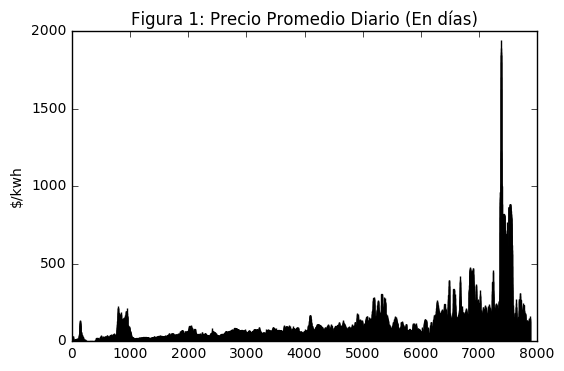

In [12]:
plt.ylabel('$/kwh')
plt.title('Figura 1: Precio Promedio Diario (En días)')
plt.bar(range(len(ppd)),ppd)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [13]:
y=[]
for n in range(len(z['Fecha'])):
    y.append(str(z.iloc[n,0])[0:7])
z['key']=y

In [14]:
ymax=z.groupby('key').max()
ymax=ymax.max(axis=1)

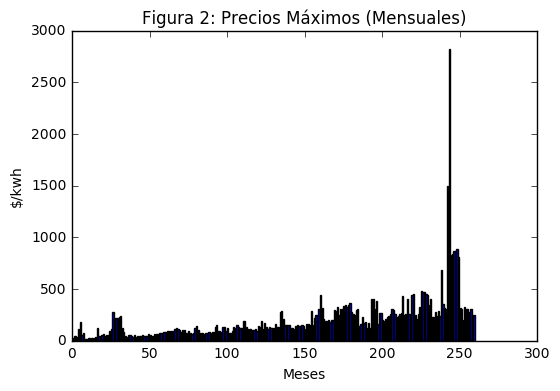

In [15]:
plt.xlabel('Meses')
plt.ylabel('$/kwh')
plt.title('Figura 2: Precios Máximos (Mensuales)')
plt.bar(range(len(ymax)),ymax)
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [16]:
ymin=z.groupby('key').min()
ymin=ymin.min(axis=1)

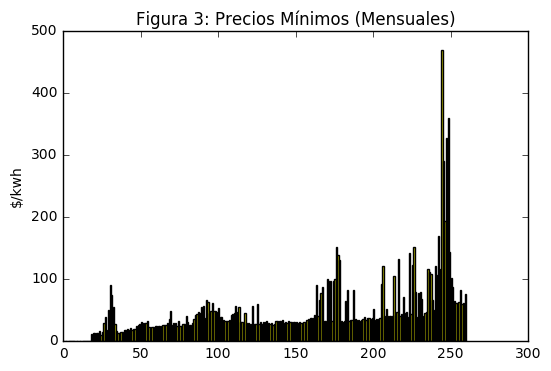

In [17]:
plt.ylabel('$/kwh')
plt.title('Figura 3: Precios Mínimos (Mensuales)')
plt.bar(range(len(ymin)),ymin, color='y')
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

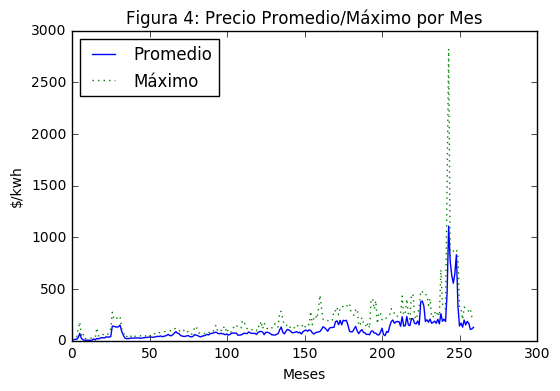

In [18]:
pmes = z.groupby('key').mean()
pmes= pmes.mean(axis=1)
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Figura 4: Precio Promedio/Máximo por Mes')
plt.plot(pd.Series(pmes).values,label="Promedio",linestyle="-")        
plt.plot(pd.Series(ymax).values, label="Máximo",linestyle=":")  
plt.legend(loc="upper left")

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [19]:
from datetime import datetime, date, time, timedelta
import calendar

   - **Paso 1.** Definición de los días de la semana (en base a la fecha).

In [20]:
fecha=[]
fecha=z['Fecha']
z['Fecha']=pd.to_datetime(z['Fecha'], format="%Y-%m-%d")
z['Dia']=z['Fecha'].dt.weekday_name

   - **Paso 2.** Días Laborales (_Lab_).

In [21]:
Lab = z['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = z[Lab]

In [22]:
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador

 - **Paso 3.** Valor Máximo (_Días Laborales_).

In [23]:
u=[]                                 
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    u.append ([i for i, e in enumerate(x) if e == max(x)])

 - **Paso 4.** Horas que produce el _precio máximo diario_.

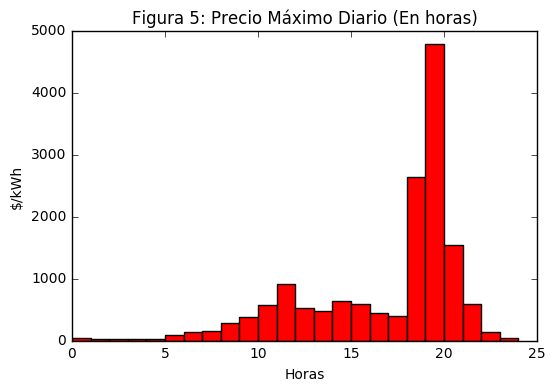

In [24]:
a=[]                     
for n in range(len(u)):
    for i in range (len(u[n])):
        a.append(u[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Figura 5: Precio Máximo Diario (En horas)')
plt.bar(range(24),rep,color='r',width = 1.0)
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

   - **Paso 1.** Se sigue el mismo procedimiento del punto anterior (_Sábados_)

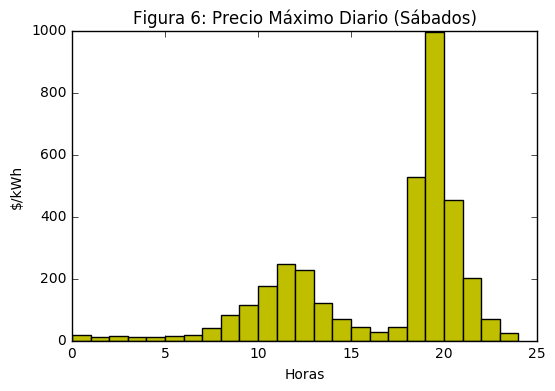

In [25]:
Sab = z['Dia'].isin(['Saturday'])
Sab = z[Sab]

indicador = ['{}'.format(n) for n in range(len(Sab))]
Sab.index = indicador


s=[]                                
for n in range(len(Sab)):
    x = pd.Series(Sab.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Figura 6: Precio Máximo Diario (Sábados)')
plt.bar(range(24),rep,color='y',width = 1.0)
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

 - **Paso 1.** Se sigue el mismo procedimiento del punto anterior (_Domingos_).

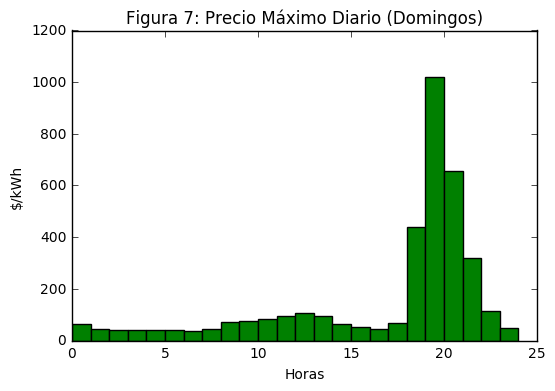

In [26]:
Dom = z['Dia'].isin(['Sunday'])
Dom = z[Dom]

indicador = ['{}'.format(n) for n in range(len(Dom))]
Dom.index = indicador


s=[]                                
for n in range(len(Dom)):
    x = pd.Series(Dom.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])
    
    a=[]                     
for n in range(len(s)):
    for i in range (len(s[n])):
        a.append(s[n][i])
rep=[]    

for n in range (24):
    rep.append(a.count(n))
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.title('Figura 7: Precio Máximo Diario (Domingos)')
plt.bar(range(24),rep,color='g',width = 1)
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [27]:
A=[]
nmatriz=z
for n in range(len(nmatriz['Fecha'])):
    A.append (str(nmatriz.iloc[n,0])[0:4])
nmatriz['year']=A
myear = nmatriz.groupby('year').min()
myear= myear.min(axis=1)

In [28]:
myear

year
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [29]:
indicador = ['{}'.format(n) for n in range(len(z))]
z.index = indicador

In [30]:
ppdm=[]
for n in range (len(z)):
    y=z.groupby('key')
    f=z.loc[y.groups[z['key'][n]]].mean() 
    f=f.mean()
    ppdm.append(f)

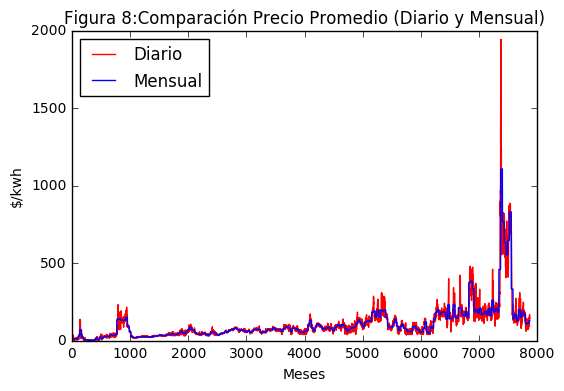

In [31]:
plt.xlabel("Meses")    
plt.ylabel("$/kwh")
plt.title('Figura 8:Comparación Precio Promedio (Diario y Mensual)')
plt.plot(pd.Series(ppd).values, label="Diario", color='r')        
plt.plot(pd.Series(ppdm).values, label="Mensual", color='b') 
plt.legend(loc="upper left")

---